In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


852 827


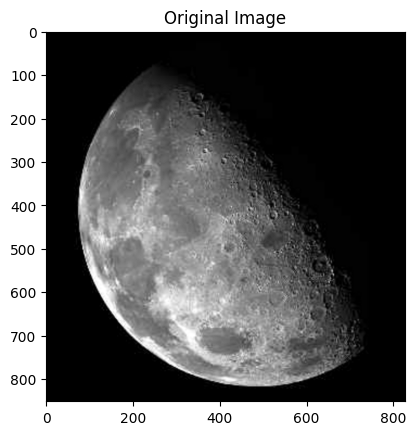

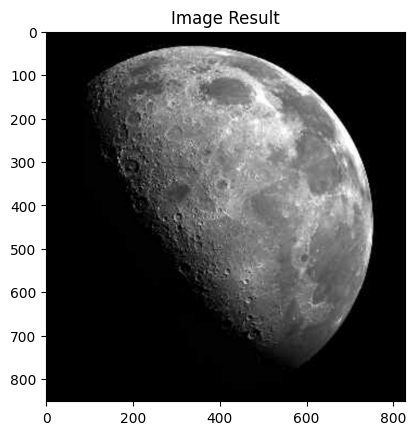

In [8]:
original_image = Image.open('../image_sources/tun.jpg').convert('L')
image = np.array(original_image)
height, width = image.shape
print(height, width)
# Create a matrix for (-1)^(x + y)
neg_one_power = np.array([[-1**(x + y) for x in range(width)] for y in range(height)])

# Multiply the image by (-1)^(x + y)
modified_image = image * neg_one_power

# Apply the DFT
dft_result = np.fft.fft2(modified_image)

# Calculate the conjugate
dft_conjugate = np.conj(dft_result)

# Apply the IDFT
idft_result = np.fft.ifft2(dft_conjugate)

# Multiply the resulting image by (-1)^(x + y) 
final_result = idft_result * neg_one_power

# Show the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Show the image after IDFT
plt.imshow(np.real(final_result), cmap='gray')
plt.title('Image Result')
plt.show()
